# Boston Housing Dataset
We will try implementing a Linear Regression Model on the Housing Dataset by finding the appropriate suitable related parameters in the data.

## Importing dependencies
Importing dependencies like numpy, pandas, sklearn, matplotlib that we are going to use in the future

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading our dataset
We load the Boston dataset and print it's description to see about what the DataFrame object is.

In [2]:
ds = datasets.load_boston()
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Converting dataset to DataFrame Object
We load our Boston dataset into a Pandas DataFrame object.

In [0]:
df = pd.DataFrame(data=np.c_[ds['data'], ds['target']], columns=np.append(ds['feature_names'], ['target']))

## Describing our dataset
We display the first 10 entries of the DataFrame object and display the summary of the dataset.

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Finding relation between the target and features
We plot a graph to see how the target feature vary with different features.

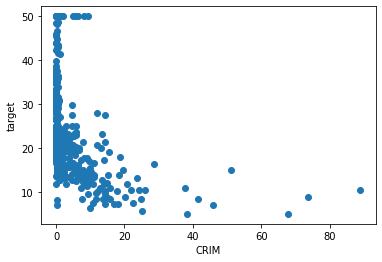

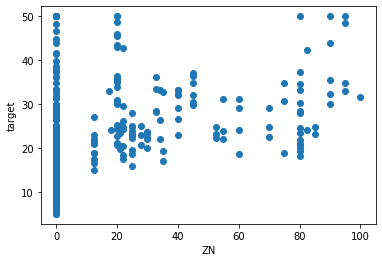

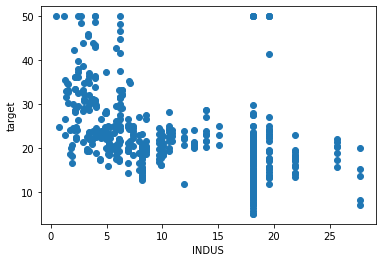

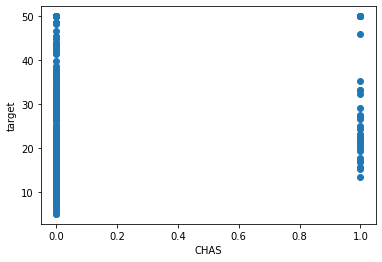

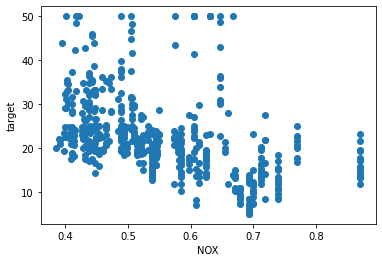

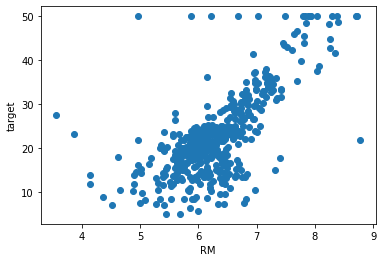

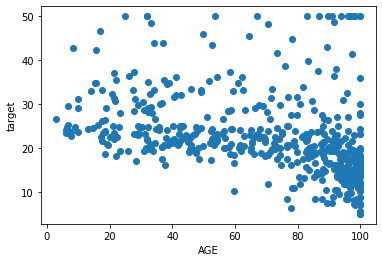

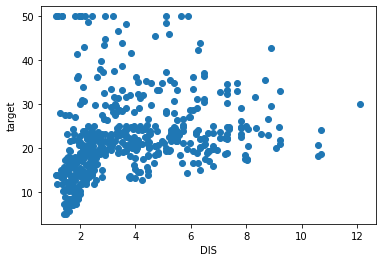

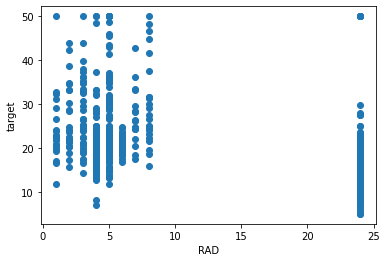

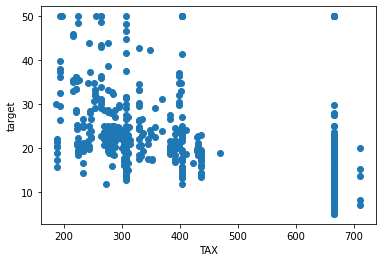

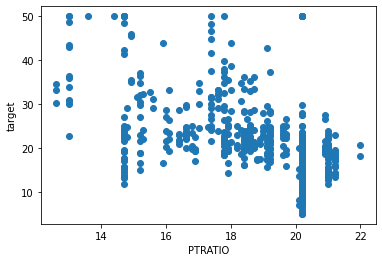

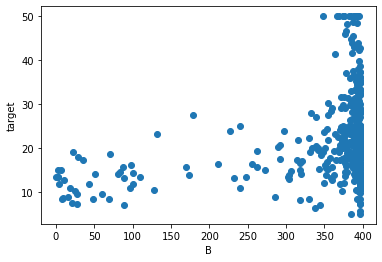

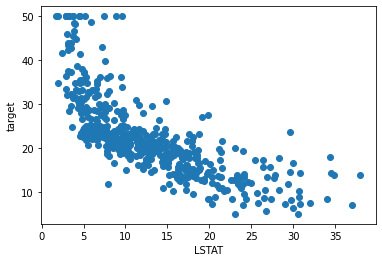

In [6]:
depends_upon = ds.feature_names
for i in depends_upon:
  x = df[i]
  y = df['target']
  plt.xlabel(i)
  plt.ylabel('target')
  plt.scatter(x, y)
  plt.show()

## Conclusion from the graphs
From the graphs we infer, that LSTAT and RM could provide us with a better understanding of the data with Regression.

We now shape the X and Y variables we are gonna use.

In [0]:
X = df[['RM', 'LSTAT']]
Y = df[['target']]

## Splitting the dataset

We use ```train_test_split``` to test our dataset into training and testing variables.

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

We create a linear regression model.

In [0]:
model = LinearRegression()

We train the Linear Regression model using the fit method.

In [10]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We make predictions for the X values in the testing dataset and store it in the y_hat variable. Now we can compare the y_hat variable with the y_test variable to compare the accuracy of our model.

In [0]:
y_hat = model.predict(x_test)

Using the in-built score method we calculate the performance score of our model.

In [12]:
model.score(x_test, y_test)

0.6420358191045996

We calculate the Root Mean Squared Error for our model by calculating the Mean Squared Error and then taking it's square root to calculate the RMSE value.

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse)

5.766369317319989


### Plotting the LSTAT versus price graph
The grey dots highlight the data fed in the testing set for variation of price with LSTAT. The red dots are what the model predicted.

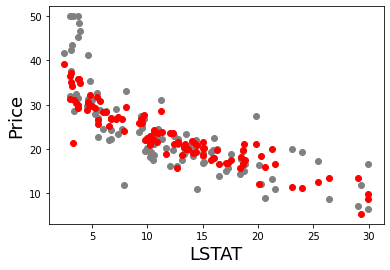

In [14]:
plt.scatter(x_test['LSTAT'], y_test, color='grey')
plt.scatter(x_test['LSTAT'], y_hat, c='red')
plt.xlabel("LSTAT", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

### Plotting the RM versus price graph
The grey dots highlight the data fed in the testing set for variation of price with RM. The red dots are what the model predicted.

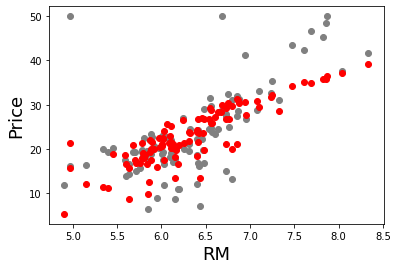

In [15]:
plt.scatter(x_test['RM'], y_test, color='grey')
plt.scatter(x_test['RM'], y_hat, c='red')
plt.xlabel("RM", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

# Conclusion
Learned about how to work with Linear Regression Models. Realised how different correlations can be found, and a better way to find correlations would be by using the Correlation matrix in the seaborn module.

The model makes fairly okayish predictions.